# Python Insights - Analisando Dados com Python

### Case - Cancelamento de Clientes

Você foi contratado por uma empresa com mais de 800 mil clientes para um projeto de Dados. Recentemente a empresa percebeu que da sua base total de clientes, a maioria são clientes inativos, ou seja, que já cancelaram o serviço.

Precisando melhorar seus resultados ela quer conseguir entender os principais motivos desses cancelamentos e quais as ações mais eficientes para reduzir esse número.

Base de dados e arquivos: https://drive.google.com/drive/folders/1uDesZePdkhiraJmiyeZ-w5tfc8XsNYFZ?usp=drive_link

In [18]:

import pandas as pd
import matplotlib.pyplot as plt



In [19]:
#passo 1: importar a base de dados
tabela = pd.read_csv('cancelamentos.csv')
#passi 2: entender a base de dados


#informações inuteis
tabela = tabela.drop(columns='CustomerID')
display(tabela)




,idade,sexo,tempo_como_cliente,frequencia_uso,ligacoes_callcenter,dias_atraso,assinatura,duracao_contrato,total_gasto,meses_ultima_interacao,cancelou
0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.00,17.0,1.0
1,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.00,6.0,1.0
2,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.00,3.0,1.0
3,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.00,29.0,1.0
4,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.00,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
881661,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0
881662,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
881663,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0
881664,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0


In [20]:
#passo 2: resolver problemas na base de dados
#informações em formato errado
#informações vazias

display(tabela.info())
tabela = tabela.dropna() #apagando linhas com informações vazias
display(tabela.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881666 entries, 0 to 881665
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   idade                   881664 non-null  float64
 1   sexo                    881664 non-null  object 
 2   tempo_como_cliente      881663 non-null  float64
 3   frequencia_uso          881663 non-null  float64
 4   ligacoes_callcenter     881664 non-null  float64
 5   dias_atraso             881664 non-null  float64
 6   assinatura              881661 non-null  object 
 7   duracao_contrato        881663 non-null  object 
 8   total_gasto             881664 non-null  float64
 9   meses_ultima_interacao  881664 non-null  float64
 10  cancelou                881664 non-null  float64
dtypes: float64(8), object(3)
memory usage: 74.0+ MB


None

<class 'pandas.core.frame.DataFrame'>
Index: 881659 entries, 0 to 881665
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   idade                   881659 non-null  float64
 1   sexo                    881659 non-null  object 
 2   tempo_como_cliente      881659 non-null  float64
 3   frequencia_uso          881659 non-null  float64
 4   ligacoes_callcenter     881659 non-null  float64
 5   dias_atraso             881659 non-null  float64
 6   assinatura              881659 non-null  object 
 7   duracao_contrato        881659 non-null  object 
 8   total_gasto             881659 non-null  float64
 9   meses_ultima_interacao  881659 non-null  float64
 10  cancelou                881659 non-null  float64
dtypes: float64(8), object(3)
memory usage: 80.7+ MB


None

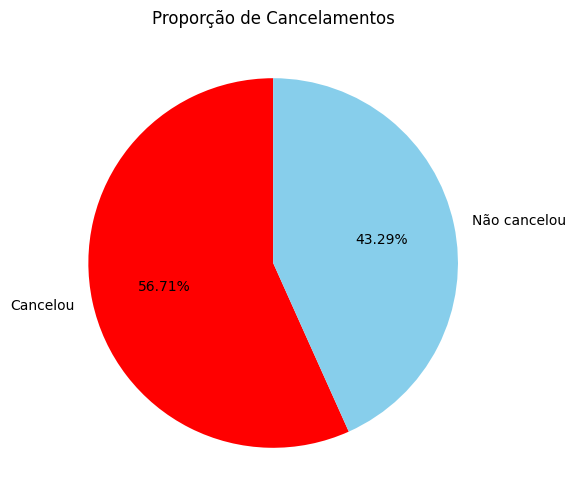

In [21]:
# Conta quantos cancelaram e quantos não cancelaram
contagem = tabela["cancelou"].value_counts(normalize=True)

contagem.index = contagem.index.map({0: "Não cancelou", 1: "Cancelou"})

# Cria o gráfico de pizza
plt.figure(figsize=(6,6))
plt.pie(contagem, 
        labels=contagem.index,   # rótulos (ex: 0 = não cancelou, 1 = cancelou)
        autopct="%.2f%%",        # mostra porcentagem com 1 casa decimal
        startangle=90,           # começa o gráfico em 90 graus
        colors=["red", "skyblue"])  # cores personalizadas

plt.title("Proporção de Cancelamentos")
plt.show()

In [22]:
#passo 5: descobrir os motivos dos cancelamentos
